# Data Analysis Project

In [21]:
import pandas
import matplotlib.pyplot as plot
from visuals import disease_stats

import numpy
%matplotlib inline

In [22]:
dataframe = pandas.read_csv('cleveland.csv')

In [23]:
dataframe.shape

(303, 14)

In [24]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [25]:
dataframe.isnull().values.any()

True

In [26]:
print("Size before Dropping Rows with Missing Values:", len(dataframe))

Size before Dropping Rows with Missing Values: 303


In [27]:
dataframe = dataframe.dropna()

In [28]:
print("Size after Dropping Rows with Missing Values:", len(dataframe))

Size after Dropping Rows with Missing Values: 297


In [29]:
dataframe.loc[dataframe['num'] != 0, 'num'] = 1

Text(0,0.5,'Number of Patients')

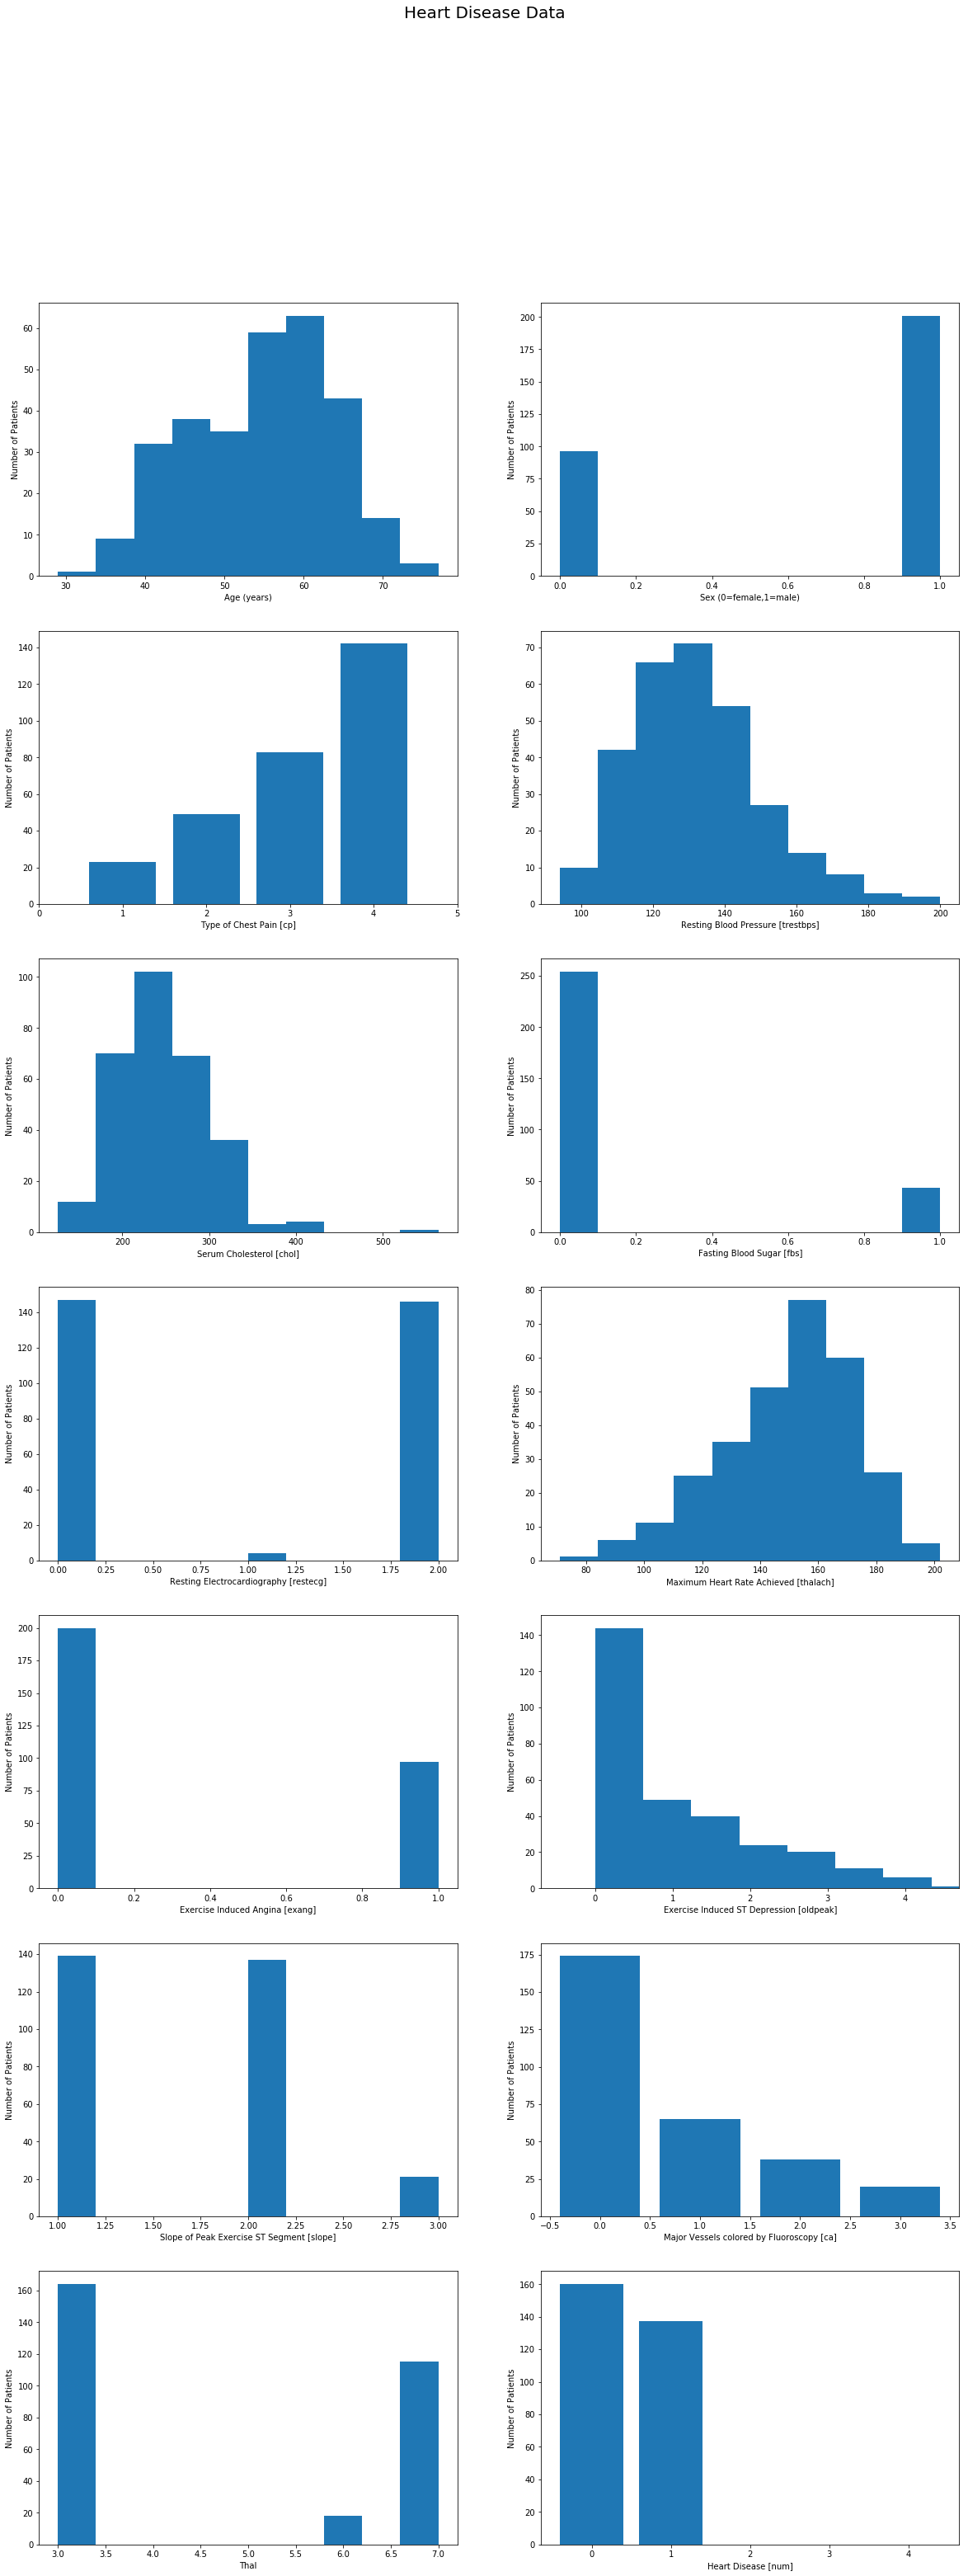

In [30]:
figure, axes = plot.subplots(nrows=7, ncols=2, figsize=(20,50) )
plot.suptitle("Heart Disease Data", fontsize=20)

axes[0,0].hist(dataframe.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(dataframe.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")

axes[1,0].hist(dataframe.cp, bins=4, range=(0.5,4.5), rwidth=0.80)
axes[1,0].set_xlim(0.0,5.0)
axes[1,0].set_xlabel("Type of Chest Pain [cp]")
axes[1,0].set_ylabel("Number of Patients")

axes[1,1].hist(dataframe.trestbps)
axes[1,1].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,1].set_ylabel("Number of Patients")

axes[2,0].hist(dataframe.chol)
axes[2,0].set_xlabel("Serum Cholesterol [chol]")
axes[2,0].set_ylabel("Number of Patients")

axes[2,1].hist(dataframe.fbs)
axes[2,1].set_xlabel("Fasting Blood Sugar [fbs]")
axes[2,1].set_ylabel("Number of Patients")

axes[3,0].hist(dataframe.restecg)
axes[3,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[3,0].set_ylabel("Number of Patients")

axes[3,1].hist(dataframe.thalach)
axes[3,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[3,1].set_ylabel("Number of Patients")

axes[4,0].hist(dataframe.exang)
axes[4,0].set_xlabel("Exercise Induced Angina [exang]")
axes[4,0].set_ylabel("Number of Patients")

axes[4,1].hist(dataframe.oldpeak)
axes[4,1].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[4,1].set_ylabel("Number of Patients")

axes[5,0].hist(dataframe.slope)
axes[5,0].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[5,0].set_ylabel("Number of Patients")

axes[5,1].hist(dataframe.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[5,1].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[5,1].set_ylabel("Number of Patients")

axes[6,0].hist(dataframe.thal)
axes[6,0].set_xlabel("Thal")
axes[6,0].set_ylabel("Number of Patients")

axes[6,1].hist(dataframe.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[6,1].set_xlabel("Heart Disease [num]")
axes[6,1].set_ylabel("Number of Patients")

In [31]:
predictions = dataframe.num
features = dataframe.drop('num', axis=1)

In [32]:
print("Cleveland dataset now has {} data points with {} variables each.".format(*dataframe.shape))

Cleveland dataset now has 297 data points with 14 variables each.


In [33]:
dataframe.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [34]:
def plot_correlation(dataframe, size=10):
    corr = dataframe.corr() # Data Frame correlation function
    figure, axes = plot.subplots(figsize=(size, size))
    axes.matshow(corr) # Color code the rectangles by correlation value
    plot.xticks(range(len(corr.columns)), corr.columns) # Draw x tick marks
    plot.yticks(range(len(corr.columns)), corr.columns) # Draw y tick marks

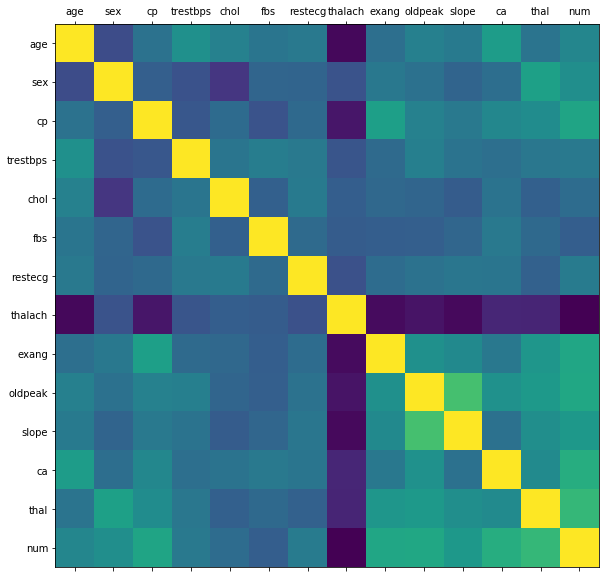

In [35]:
plot_correlation(dataframe)

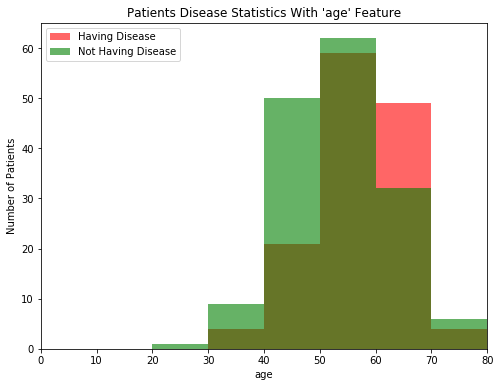

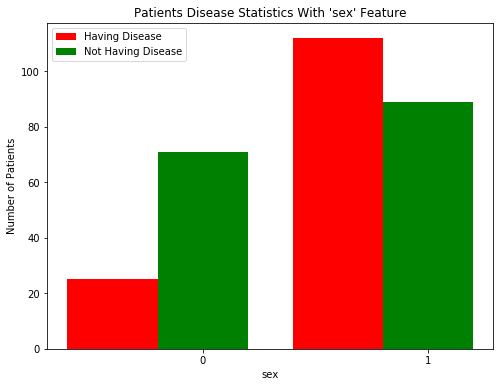

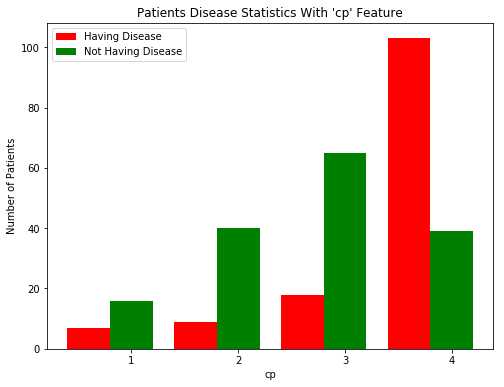

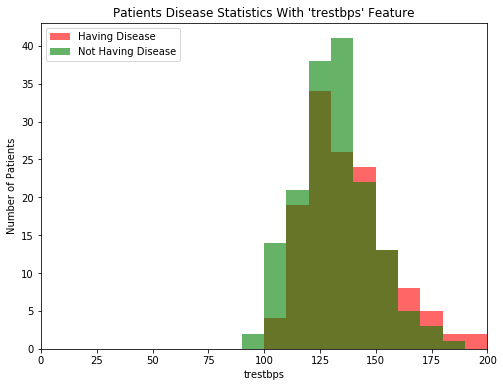

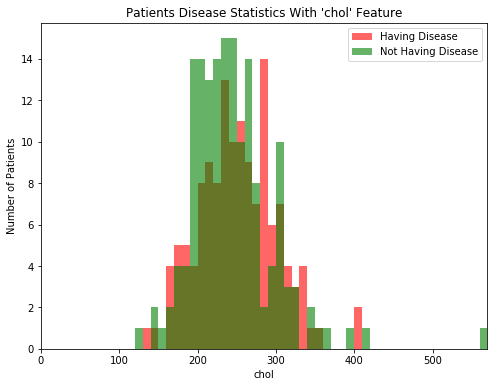

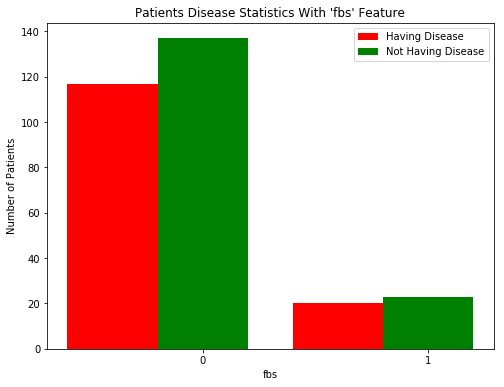

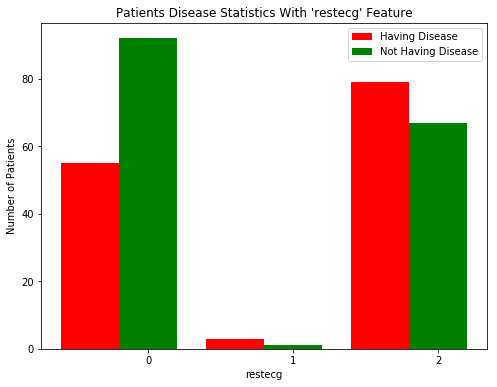

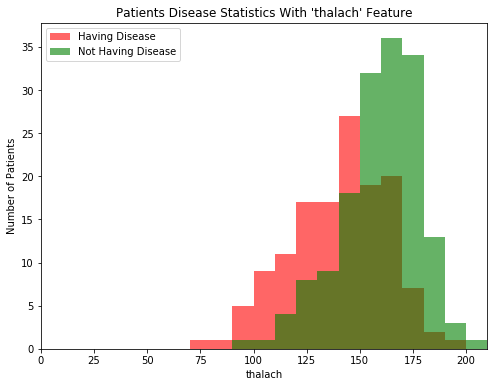

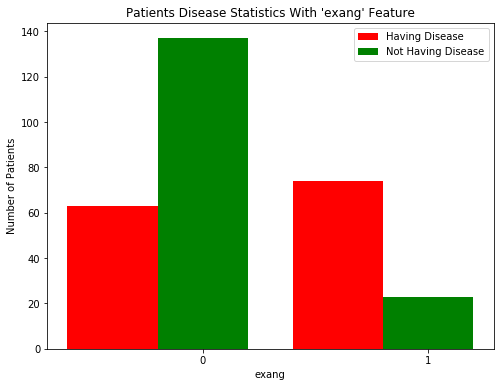

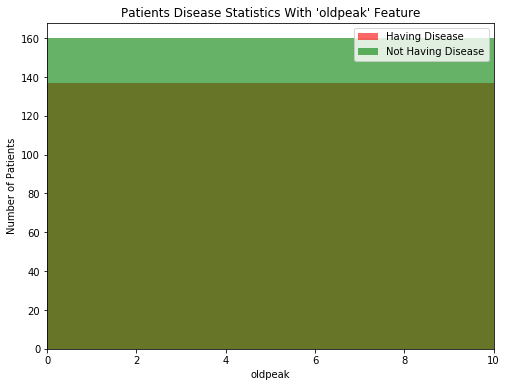

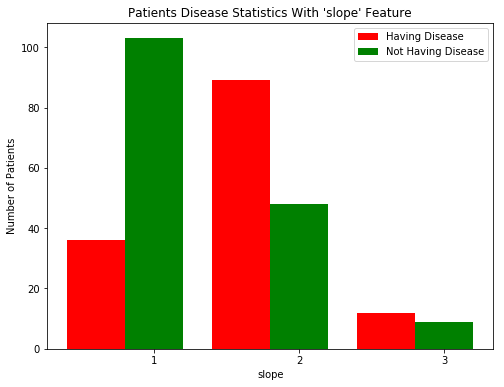

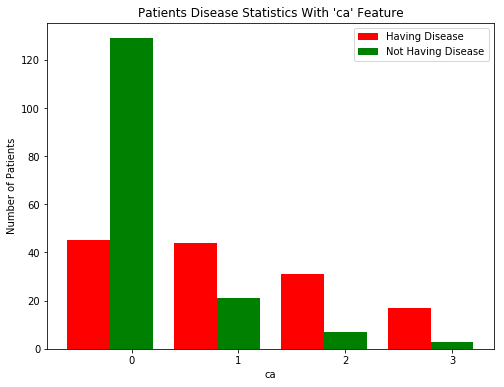

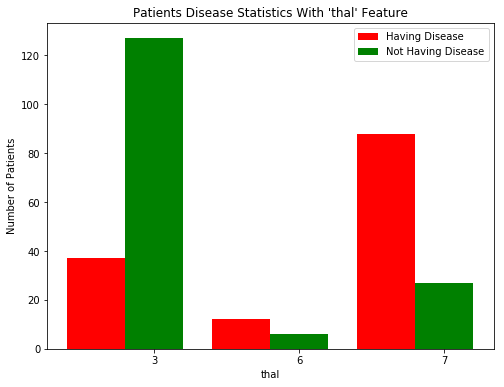

In [36]:
for key in features.columns.values:
    disease_stats(features, predictions, key)

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, predictions, test_size=0.30, random_state=42)

In [38]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

best = {"mean_score": 0}
for length in range(9, 14):
    for columns in itertools.combinations(features.columns.values, length):
        model = LogisticRegression(penalty="l1",C=0.8, random_state=37)
        scores = cross_val_score(model, features[list(columns)], predictions, cv=10, scoring='accuracy')
        result = {"columns": columns, "mean_score": scores.mean(), "scores": scores}
        if best["mean_score"] < result["mean_score"]:
            best = result

In [39]:
print(best)

{'columns': ('sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'), 'mean_score': 0.8587356321839081, 'scores': array([0.9       , 0.83333333, 0.86666667, 0.96666667, 0.83333333,
       0.76666667, 0.8       , 0.93103448, 0.79310345, 0.89655172])}
